# Spatial Analysis of master_gdf

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install folium

# Import Data

In [3]:
master_gdf = pd.read_csv('master_gdf.csv')
master_gdf.head()

,ACCNUM,YEAR,DATE,TIME,collision_datetime,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,hourly_ex_peds,hourly_wx_peds,hourly_nx_bike,hourly_sx_bike,hourly_ex_bike,hourly_wx_bike,hourly_nx_other,hourly_sx_other,hourly_ex_other,hourly_wx_other
0,1237939,2011.0,2011-03-09,726,2011-03-09 07:26:00,COLLEGE Stre,BATHURST Stre,None,Major Arterial,Toronto and East York,...,208.0,160.0,50.0,2.0,43.0,312.0,0.0,0.0,0.0,0.0
1,1232522,2011.0,2011-03-09,1145,2011-03-09 11:45:00,JANE ST,ST JOHNS RD,None,Major Arterial,Toronto and East York,...,59.0,36.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0
2,1232522,2011.0,2011-03-09,1145,2011-03-09 11:45:00,JANE ST,ST JOHNS RD,None,Major Arterial,Toronto and East York,...,59.0,36.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0
3,1232522,2011.0,2011-03-09,1145,2011-03-09 11:45:00,JANE ST,ST JOHNS RD,None,Major Arterial,Toronto and East York,...,59.0,36.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0
4,1222866,2011.0,2011-03-12,1917,2011-03-12 19:17:00,CHURCH ST,GOULD ST,None,Minor Arterial,Toronto and East York,...,222.0,97.0,106.0,27.0,31.0,9.0,0.0,0.0,0.0,0.0


In [4]:
master_gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Columns: 152 entries, ACCNUM to hourly_wx_other
dtypes: float64(98), int64(1), object(53)
memory usage: 9.5+ MB


Question being answered: What areas in Toronto have a high concentration of motor vehicle collisions resulting in fatalities or serious injuries?

Visualizations:
- Heatmap of Collisions: Create a heatmap to visualize the spatial distribution of collisions. This can help identify areas with high concentrations.
- Bar Chart of Fatalities and Injuries: Compare the number of fatalities and serious injuries across different areas or neighborhoods.


Code Analysis:
- Calculate Collision Density: Use geographical analysis to calculate collision density per unit area. This can be achieved using clustering algorithms or spatial analysis techniques.


# Visualizations: Collisions Throughout Toronto

In [5]:
import folium
from folium import Marker
from folium.plugins import MarkerCluster

In [6]:
from shapely import wkt

# Convert 'count_geometry' column to Shapely Point geometries
master_gdf['count_geometry'] = master_gdf['count_geometry'].apply(lambda x: wkt.loads(x))

# Initialize the map centered at Toronto
toronto_map = folium.Map(location=[43.65107, -79.347015], zoom_start=11)

# Create MarkerCluster object
marker_cluster = MarkerCluster().add_to(toronto_map)

# Iterate through the dataframe to add markers to the MarkerCluster
for idx, row in master_gdf.iterrows():
    folium.Marker([row['count_geometry'].y, row['count_geometry'].x]).add_to(marker_cluster)

# Display the map
toronto_map

In [7]:
from folium.plugins import HeatMap

# Initialize a new map centered at Toronto
heatmap_toronto_map = folium.Map(location=[43.65107, -79.347015], zoom_start=11)

# Extracting coordinates for HeatMap
heat_data = [[point.y, point.x] for point in master_gdf['count_geometry']]

# Create HeatMap
HeatMap(heat_data).add_to(heatmap_toronto_map)

# Display the heatmap map
heatmap_toronto_map

In [8]:
unique_acclass = master_gdf['ACCLASS'].unique()
unique_acclass

array(['Non-Fatal Injury', 'Fatal', 'Property Damage Only', 'None'],
      dtype=object)

In [9]:
unique_wards = master_gdf['WARDNUM'].unique()
unique_wards

array([1.1000000e+01, 4.0000000e+00, 1.3000000e+01, 1.0000000e+01,
       9.0000000e+00, 2.4000000e+01, 2.5000000e+01, 2.0000000e+00,
       3.0000000e+00, 1.1100000e+03, 7.0000000e+00, 8.0000000e+00,
       1.8000000e+01, 2.3000000e+01, 6.0000000e+00, 1.0000000e+00,
       1.1130000e+03, 2.3240000e+03, 1.9000000e+01, 1.0130000e+03,
       1.6000000e+01, 5.0000000e+00, 2.0000000e+01, 2.1240000e+03,
       8.1500000e+02, 2.2000000e+01, 8.1200000e+02, 1.4000000e+01,
       1.1101300e+05, 1.7220000e+03, 2.1000000e+01, 1.6210000e+03,
       1.2110000e+03, 6.1800000e+02, 1.2000000e+01, 1.5000000e+01,
       9.1200000e+02, 7.6000000e+01, 2.3250000e+03, 2.2230000e+03,
       1.4190000e+03, 9.1100000e+02, 1.7000000e+01, 5.9000000e+01,
       1.8170000e+03, 2.1200000e+03, 4.9100000e+03, 1.1150000e+03,
       4.1000000e+02, 9.1110000e+04, 1.6200000e+03, 1.5160000e+03,
       1.6192000e+05, 2.4250000e+03, 1.9200000e+03, 1.0140000e+03,
       9.1000000e+02, 2.0240000e+03, 2.1230000e+03, 1.2150000e

In [10]:
unique_districts = master_gdf['DISTRICT'].unique()
unique_districts

array(['Toronto and East York', 'Scarborough', 'Etobicoke York',
       'North York', 'None', 'Toronto East York'], dtype=object)

In [11]:
unique_neighbourhoods = master_gdf['NEIGHBOURHOOD_158'].unique()
unique_neighbourhoods

array(['Kensington-Chinatown', 'Runnymede-Bloor West Village',
       'Downtown Yonge East', 'Church-Wellesley', 'Moss Park',
       'Rosedale-Moore Park', 'Yonge-Bay Corridor',
       'Corso Italia-Davenport', 'Scarborough Village', 'Malvern East',
       'Eringate-Centennial-West Deane', 'Etobicoke City Centre',
       'Little Portugal', 'Humbermede', 'Englemount-Lawrence',
       'Pelmo Park-Humberlea', 'Cabbagetown-South St.James Town',
       'Newtonbrook East', 'Morningside Heights',
       'Oakdale-Beverley Heights', 'West Humber-Clairville',
       'Woburn North', 'Annex', 'Woodbine Corridor', 'Rexdale-Kipling',
       'Mimico-Queensway', 'Victoria Village', 'Junction Area',
       'Dovercourt Village', 'St Lawrence-East Bayfront-The Islands',
       'Cliffcrest', 'Rockcliffe-Smythe',
       'Mount Olive-Silverstone-Jamestown', 'St.Andrew-Windfields',
       'Bridle Path-Sunnybrook-York Mills', 'Markland Wood',
       'Brookhaven-Amesbury', 'Junction-Wallace Emerson',
       'W

# Visualizations: Collision Classification Types Per District

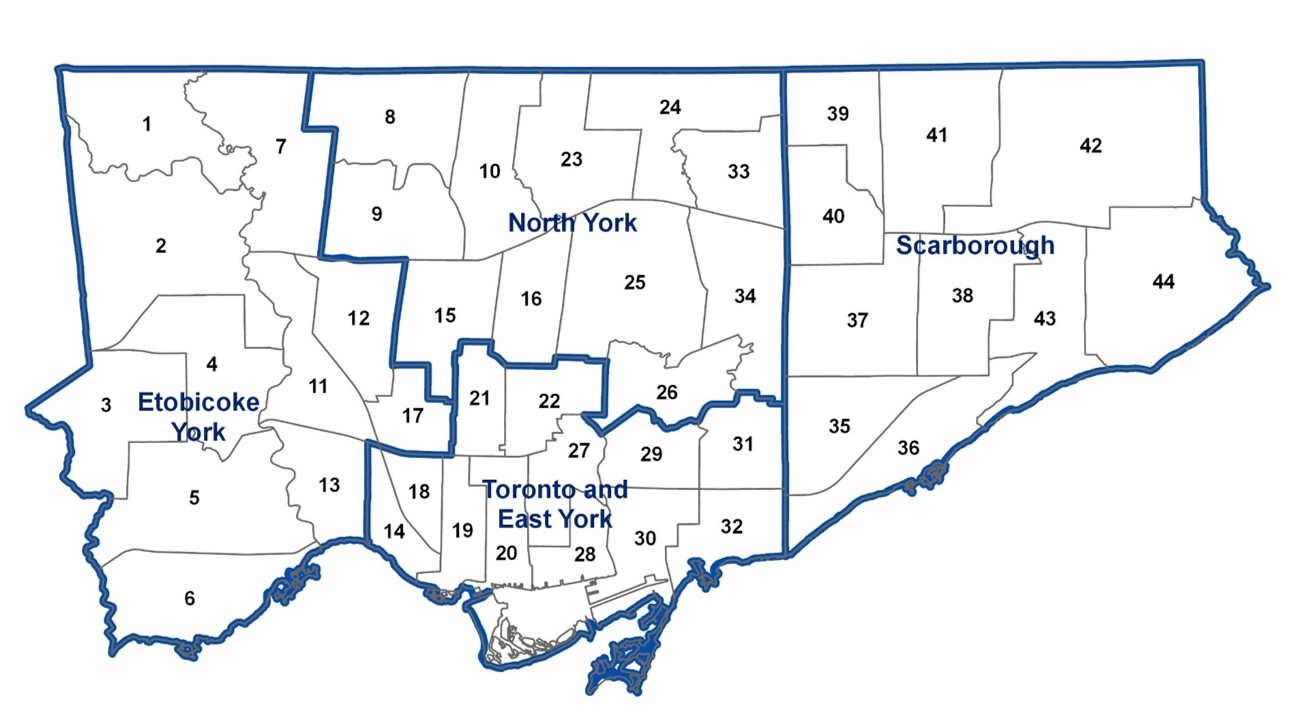

In [12]:
from IPython.display import Image

Image(filename='toronto_districts.jpg')

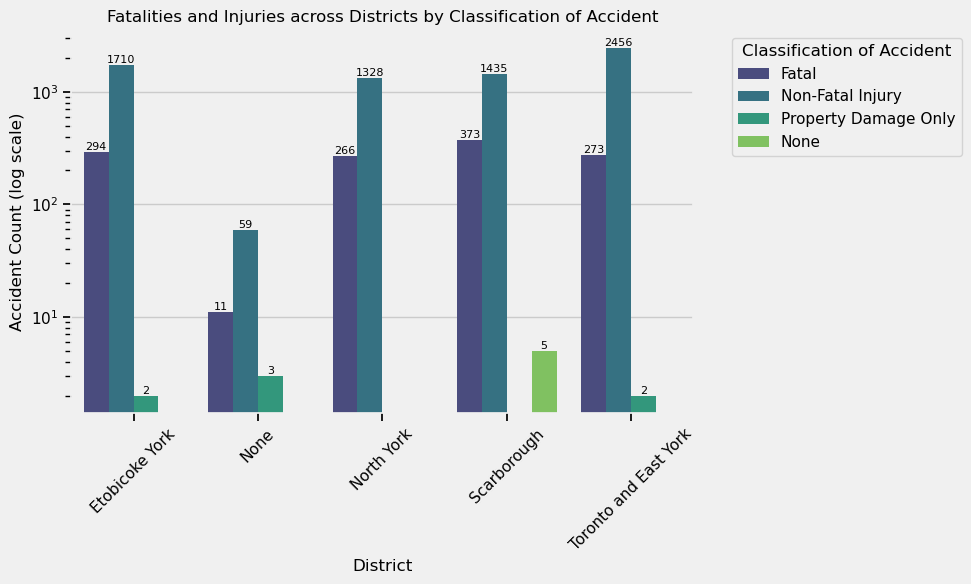

In [13]:
# Merge 'Toronto and East York' and 'Toronto East York' into a single category
master_gdf['DISTRICT'].replace({'Toronto East York': 'Toronto and East York'}, inplace=True)

# Group the data by 'DISTRICT' and 'ACCLASS', and calculate counts
grouped_data = master_gdf.groupby(['DISTRICT', 'ACCLASS']).size().reset_index(name='Count')

# Plotting a grouped bar plot with annotations
plt.figure(figsize=(10, 6))
sns.barplot(x='DISTRICT', y='Count', hue='ACCLASS', data=grouped_data, palette='viridis')

# Replace NaN values in 'Count' column with zeros
grouped_data['Count'].fillna(0, inplace=True)

# Annotate the bars with count numbers
for p in plt.gca().patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    if not pd.isnull(y):
        plt.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=8)  # Adjust the fontsize as desired

# Set logarithmic scale for y-axis
plt.yscale('log')

# Place the legend outside the plot area
plt.legend(title='Classification of Accident', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Fatalities and Injuries across Districts by Classification of Accident')
plt.xlabel('District')
plt.ylabel('Accident Count (log scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Pivot the grouped data to get a table view
table_view = grouped_data.pivot(index='DISTRICT', columns='ACCLASS', values='Count').fillna(0)

# Convert values to integers and move 'None' column to the end
table_view = table_view.astype(int)
table_view = table_view[[col for col in table_view.columns if col != 'None'] + ['None']]

# Style the table with a different color gradient
def color_negative_red(val):
    color = 'red' if val > table_view.values.mean() else 'green'
    return f'color: {color}'

styled_table = table_view.style.applymap(color_negative_red) \
    .set_caption('Accident Counts by District and Classification') \
    .set_table_styles([{
        'selector': 'caption',
        'props': [
            ('color', 'blue'),
            ('font-size', '18px')
        ]
    }])

# Set column widths to evenly spaced
styled_table.set_table_styles([{
    'selector': 'td',
    'props': [('width', '50px')]
}])

# Display the styled table
styled_table

ACCLASS,Fatal,Non-Fatal Injury,Property Damage Only,None
DISTRICT,,,,
Etobicoke York,294,1710,2,0
None,11,59,3,0
North York,266,1328,0,0
Scarborough,373,1435,0,5
Toronto and East York,273,2456,2,0


In [23]:
# Calculate total counts per district and add as a 'Total' column
table_view['TOTAL'] = table_view.sum(axis=1)

# Style the table with a different color gradient
def color_negative_red(val):
    color = 'red' if val > table_view['TOTAL'].mean() else 'green'
    return f'color: {color}'

styled_table = table_view.style.applymap(color_negative_red) \
    .set_caption('Accident Counts by District and Classification') \
    .set_table_styles([{
        'selector': 'caption',
        'props': [
            ('color', 'blue'),
            ('font-size', '18px')
        ]
    }])

# Set column widths to evenly spaced
styled_table.set_table_styles([{
    'selector': 'td',
    'props': [('width', '50px')]
}])

# Display the styled table
styled_table

ACCLASS,Fatal,Non-Fatal Injury,Property Damage Only,None,TOTAL
DISTRICT,,,,,
Etobicoke York,294,1710,2,0,2006
None,11,59,3,0,73
North York,266,1328,0,0,1594
Scarborough,373,1435,0,5,1813
Toronto and East York,273,2456,2,0,2731


# Now break it down --> Wards

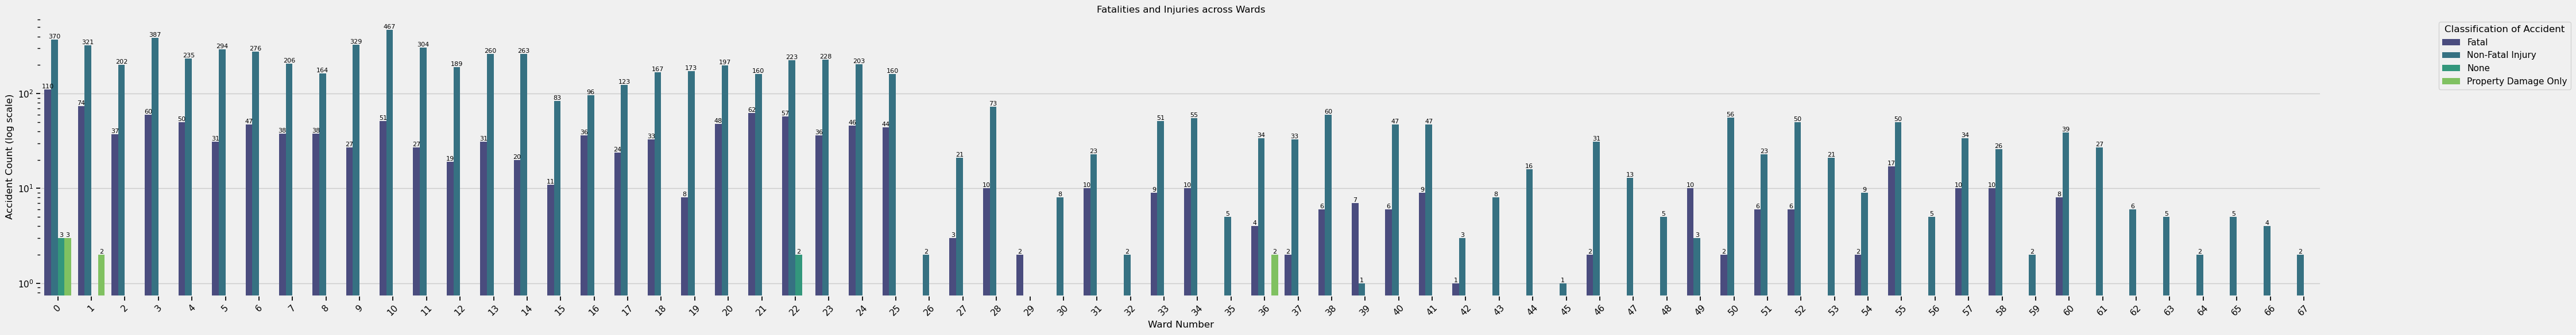

In [17]:
import matplotlib.ticker as ticker

# Group the data by 'WARDNUM' and 'ACCLASS', and calculate counts
grouped_data_1 = master_gdf.groupby(['WARDNUM', 'ACCLASS']).size().reset_index(name='Count')

# Set the figure size
plt.figure(figsize=(45, 6))

# Create the bar plot
ax = sns.barplot(x='WARDNUM', y='Count', hue='ACCLASS', data=grouped_data_1, palette='viridis')

# Replace NaN values in 'Count' column with zeros
grouped_data_1['Count'].fillna(0, inplace=True)

# Annotate the bars with count numbers
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    if not pd.isnull(y):
        plt.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=8)  # Adjust the fontsize as desired

# Set logarithmic scale for y-axis
plt.yscale('log')

# Place the legend outside the plot area
plt.legend(title='Classification of Accident', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Fatalities and Injuries across Wards')
plt.xlabel('Ward Number')
plt.ylabel('Accident Count (log scale)')

# Format x-axis ticks as integers
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Group the data by 'WARDNUM' and calculate counts
ward_collisions = master_gdf['WARDNUM'].value_counts().reset_index()
ward_collisions.columns = ['WARDNUM', 'Collision_Count']
ward_collisions['WARDNUM'] = ward_collisions['WARDNUM'].astype(int)

# Sort the wards by collision count in descending order
ward_collisions = ward_collisions.sort_values(by='Collision_Count', ascending=False)

# Select wards with the most collisions (top 10)
top_wards = ward_collisions.head(10)  # Display the top 10 wards

# Display the DataFrame with wards having the most collisions
top_wards

,WARDNUM,Collision_Count
0,10,518
1,0,486
2,3,447
3,1,397
4,9,356
5,11,331
6,5,325
7,6,323
8,13,291
9,4,285


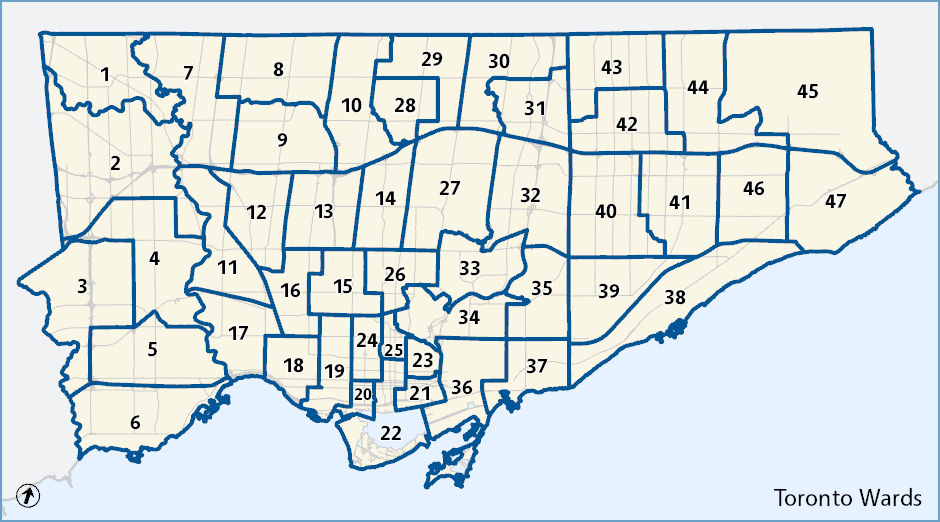

In [19]:
Image(filename='toronto_wards.jpg')

# ...Let's do it by neighborhoods

In [20]:
# Group the data by 'NEIGHBOURHOOD_158' and calculate counts
neighborhood_collisions = master_gdf['NEIGHBOURHOOD_158'].value_counts().reset_index()
neighborhood_collisions.columns = ['NEIGHBOURHOOD_158', 'Collision_Count']

# Sort the neighborhoods by collision count in descending order
neighborhood_collisions = neighborhood_collisions.sort_values(by='Collision_Count', ascending=False)

# Select neighborhoods with the most collisions (top 10, for example)
top_neighborhoods = neighborhood_collisions.head(10)

# Display the DataFrame with neighborhoods having the most collisions
top_neighborhoods

,NEIGHBOURHOOD_158,Collision_Count
0,West Humber-Clairville,245
1,Yonge-Bay Corridor,200
2,St Lawrence-East Bayfront-The Islands,157
3,South Riverdale,147
4,Wexford/Maryvale,138
5,Moss Park,130
6,Clairlea-Birchmount,128
7,Milliken,127
8,Morningside Heights,126
9,South Parkdale,118


# Question being answered: What areas in Toronto have a high concentration of motor vehicle collisions resulting in fatalities or serious injuries?

In [21]:
# Group the data by 'NEIGHBOURHOOD_158' and 'ACCLASS' and calculate counts
neighborhood_acclass_collisions = master_gdf.groupby(['NEIGHBOURHOOD_158', 'ACCLASS']).size().reset_index(name='Collision_Count')

# Pivot the table to have ACCLASS as columns
neighborhood_acclass_collisions_pivot = neighborhood_acclass_collisions.pivot(
    index='NEIGHBOURHOOD_158', columns='ACCLASS', values='Collision_Count').fillna(0).astype(int).reset_index()

# Sum up all types of collisions per neighborhood
neighborhood_acclass_collisions_pivot['Total_Collisions'] = neighborhood_acclass_collisions_pivot.sum(axis=1)

# Display the DataFrame with neighborhoods having the most collisions and ACCLASS breakdown
top_neighborhoods = neighborhood_acclass_collisions_pivot.sort_values(by='Total_Collisions', ascending=False).head(10)

#reset the index
top_neighborhoods.reset_index(drop=True, inplace=True)

top_neighborhoods

ACCLASS,NEIGHBOURHOOD_158,Fatal,Non-Fatal Injury,None,Property Damage Only,Total_Collisions
0,West Humber-Clairville,53,192,0,0,245
1,Yonge-Bay Corridor,22,178,0,0,200
2,St Lawrence-East Bayfront-The Islands,31,126,0,0,157
3,South Riverdale,10,137,0,0,147
4,Wexford/Maryvale,25,113,0,0,138
5,Moss Park,19,111,0,0,130
6,Clairlea-Birchmount,28,97,3,0,128
7,Milliken,32,95,0,0,127
8,Morningside Heights,20,106,0,0,126
9,South Parkdale,27,91,0,0,118


# Calculate Collision Density: Use geographical analysis to calculate collision density per unit area. This can be achieved using clustering algorithms or spatial analysis techniques.

In [22]:
toronto_land_area_kmsq = 630

total_collisions = len(master_gdf)

# Calculate collision density per unit area
collision_density = total_collisions / toronto_land_area_kmsq

print(f'Collision density per square kilometer area: {collision_density:.6f} collisions per square kilometer area')

Collision density per square kilometer area: 13.042857 collisions per square kilometer area
